In [1]:
import argparse
import midi
import os

from constants import *
from dataset import load_all
from generate import write_file, generate
from play_music_util import play_music

import pygame
import base64

# from playsound import playsound
import numpy as np
import copy 

/opt/miniconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import math
import time
from IPython import display
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import optim
%matplotlib inline

import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch

In [3]:
styles = [['data/Bach1']]
styles[0]

['data/Bach1']

In [4]:
print('Loading data')
train_data, train_labels = load_all(styles, BATCH_SIZE, SEQ_LEN)

Loading data


In [5]:
train_data[0].shape

(81, 128, 48, 3)

In [6]:
from model import Generator, iterate_minibatches, compute_loss, train

In [7]:
generator = Generator()
generator.cuda()

Generator(
  (dropout): Dropout(p=0.5)
  (time_ax): time_axis(
    (attention_layer): MultiHeadedAttention(
      (linears): ModuleList(
        (0): Linear(in_features=78, out_features=78, bias=False)
        (1): Linear(in_features=78, out_features=78, bias=False)
        (2): Linear(in_features=78, out_features=78, bias=False)
      )
      (linear): Linear(in_features=78, out_features=78, bias=False)
      (dropout): Dropout(p=0.1)
    )
    (padding): ZeroPad2d((11, 12, 0, 0))
    (conv): Conv1d(3, 64, kernel_size=(24,), stride=(1,))
    (time_lstm): LSTM(78, 256, num_layers=2, batch_first=True, dropout=0.1)
    (dropout): Dropout(p=0.5, inplace)
  )
  (note_ax): note_axis(
    (note_lstm): LSTM(259, 128, num_layers=2, batch_first=True, dropout=0.1)
    (dropout): Dropout(p=0.2, inplace)
    (logits): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [8]:
X_tr = train_data[0][:-1]
X_te = train_data[0][-1:]
y_tr = train_labels[0][:-1]
y_te = train_labels[0][-1:]

In [9]:
X_tr.shape, X_te.shape

((80, 128, 48, 3), (1, 128, 48, 3))

Epoch 50 of 50 took 3.821s
current train loss: 0.019123741023940967
current val loss: 0.020477287471294403


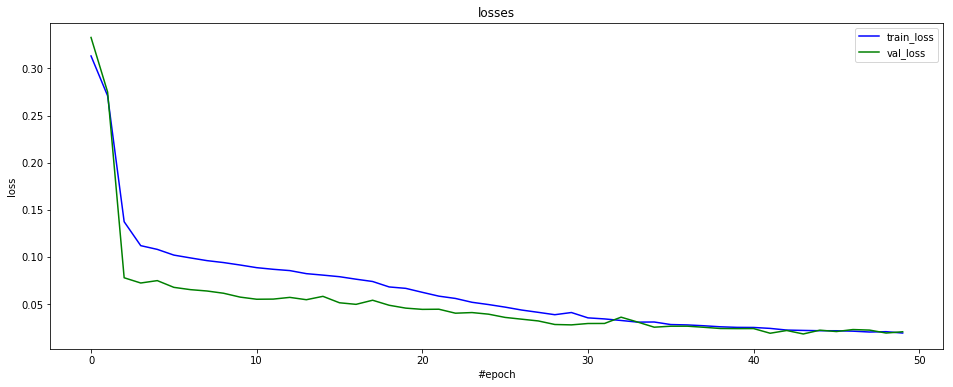

Finished!


In [10]:
generator, epoch_history = train(generator, X_tr, X_te, y_tr, y_te, 
                                 batchsize=1, n_epochs = 50)

Epoch 50 of 50 took 3.675s
current train loss: 0.01685678544563416
current val loss: 0.015351194888353348


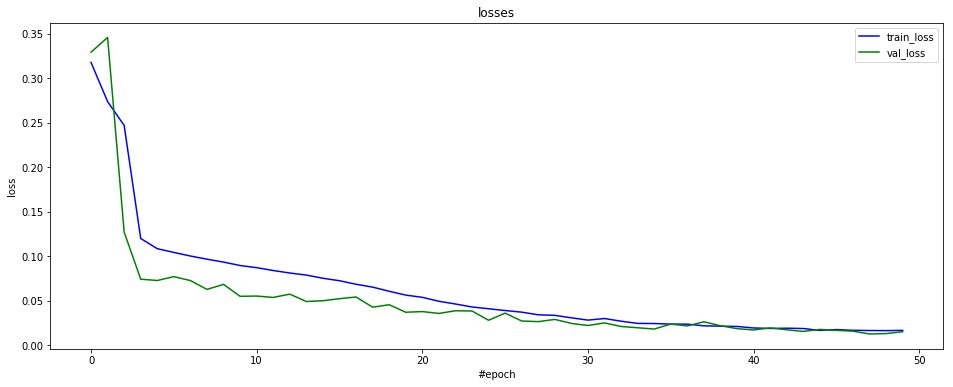

Finished!


In [10]:
generator, epoch_history = train(generator, X_tr, X_te, y_tr, y_te, 
                                 batchsize=1, n_epochs = 50)

Epoch 50 of 50 took 3.620s
current train loss: 0.013189128920566872
current val loss: 0.012273742817342281


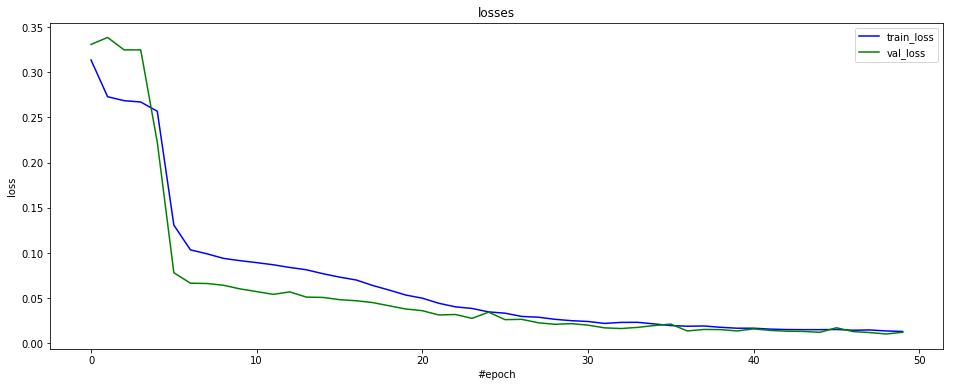

Finished!


In [32]:
generator, epoch_history = train(generator, X_tr, X_te, y_tr, y_te, 
                                 batchsize=1, n_epochs = 50)

In [33]:
# generator.eval

## Save/load the model

In [34]:
# from model import Generator, iterate_minibatches, compute_loss, train
# torch.save(generator.state_dict(), os.path.join(OUT_DIR, 'model_canonical'))
# the_model = Generator()
# the_model.load_state_dict(torch.load(os.path.join(OUT_DIR, 'model_canonical')))

In [35]:
# print(the_model)
# for i in list(the_model.note_ax.note_lstm.parameters()):
#     print(i.shape)

In [36]:
# dummy_note = Variable(torch.Tensor(train_data[0]))
# chosen = Variable(torch.Tensor(train_data[1]))

# # output = generator.forward(dummy_note, chosen)
# output = the_model.forward(dummy_note, chosen)

# print('dummy_time_features :', output.shape)
# output[0][0][3], output2[0][0][3]

# Canonical

In [11]:
generator.cuda()
write_file('output/canonical_test', generate(generator, 8))

  0%|          | 0/128 [00:00<?, ?it/s]

Generating with no styles:


100%|██████████| 128/128 [00:18<00:00,  6.98it/s]

Writing file out/samples/output/canonical_test_0.mid


In [93]:
# midi_file = 'out/samples/output/canonical_test_0.mid'
# play_music(midi_file)